<a href="https://colab.research.google.com/github/sbolivara16/Tools-for-Molecular-Docking/blob/main/Gypsum_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



🧬💊 **Introduction to Gypsum-DL: Essential Tool in Rational Drug Design** 💡🔬

**Santiago Bolivar A, Qco, M.Sc, Ph.D. Conicet, National University of Rosario, Argentina**


Check this and other notebooks on my github profile 🔍📚✅💻[GitHUB profile](https://github.com/sbolivara16)

Rational drug design is a key process in creating new medications 🩺. It involves using detailed knowledge about molecular structures and disease mechanisms to design chemical compounds that can effectively interact with specific biological targets 🧠🔍.

***Why is Gypsum-DL important?*** 🤔
1. Generation of 3D Conformations 🌐
Gypsum-DL allows for the generation of multiple three-dimensional conformations of small molecules 🌟. This is crucial because the way a molecule interacts with its target depends on its 3D conformation. Obtaining various conformations helps explore all possible interactions between the drug and its target 🔄.

2. **Optimization of the Design Process *texto en cursiva* **🛠️
The software automates and accelerates the preparation of molecular libraries for virtual screening 📈. This saves time and resources compared to manual methods, allowing researchers to focus on interpreting results and making strategic decisions 🧩.

3. ***Improves Accuracy of Virtual Screening*** 🎯
With Gypsum-DL, more accurate models for virtual screening can be generated 🧪. This increases the likelihood of identifying lead compounds that are truly effective, minimizing false positives and negatives 🚦.

4. ***Facilitates Exploration of Chemical Diversity*** 🧪
The tool helps explore a wide range of chemical structures and their possible conformations, which is essential for finding molecules with the desired biological activity 📚🔍.

5. ***Integration with Other Tools and Platforms*** 🔗
Gypsum-DL can easily integrate with other computational chemistry and structural biology tools 🔄, facilitating a cohesive and efficient workflow from compound generation to detailed analysis 🔬.

**In this case we will use it, from a smile file, to create the 3D structure of the molecules of interest, and then be able to visualize them in platforms such as pymol, and then use them as ligands in virtual screening in therapeutic targets.**


Reference:
1. https://durrantlab.pitt.edu/gypsum-dl/
2. https://iwatobipen.wordpress.com/2024/07/20open-source-structure-preparation-package-for-small-molecule-virtual-screening-rdkit-oss-cheminformatics/





# **Let's install the libraries**

In [1]:
# Install OpenMPI
!apt-get install -y openmpi-bin

# Install Micromamba
!curl -Ls https://micro.mamba.pm/api/micromamba/linux-64/latest | tar -xvj bin/micromamba

# Crear un entorno y activar con Micromamba
!./bin/micromamba create -n gypsum_dl_env -c conda-forge rdkit numpy scipy mpi4py pymol-open-source -y
!./bin/micromamba init --shell=bash --prefix=$HOME/micromamba
!source $HOME/micromamba/etc/profile.d/micromamba.sh

# Clone el repositorio de gypsum_dl
!git clone https://github.com/durrantlab/gypsum_dl.git
%cd gypsum_dl

# Activar el entorno creado (necesitarás reiniciar el kernel para que los cambios surtan efecto)
!micromamba activate gypsum_dl_env

!pip install rdkit-pypi
!pip install rdkit


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
openmpi-bin is already the newest version (4.1.2-2ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
bin/micromamba
warning  libmamba 'root_prefix' set with default value: /root/micromamba
[+] 0.0s
[+] 0.1s
conda-forge/linux-64  ⣾  
conda-forge/noarch    ⣾  [+] 0.2s
conda-forge/linux-64   5%
conda-forge/noarch     7%[+] 0.3s
conda-forge/linux-64  11%
conda-forge/noarch    35%[+] 0.4s
conda-forge/linux-64  23%
conda-forge/noarch    49%[+] 0.5s
conda-forge/linux-64  26%
conda-forge/noarch    63%[+] 0.6s
conda-forge/linux-64  35%
conda-forge/noarch    70%[+] 0.7s
conda-forge/linux-64  41%
conda-forge/noarch    84%conda-forge/noarch                                
[+] 0.8s
conda-forge/linux-64  44%[+] 0.9s
conda-forge/linux-64  47%[+] 1.0s
conda-forge/linux-64  53%[+] 1.1s
conda-forge/linux-64  65%[+] 1.2s
conda-forge/linux-64  77%[+] 1.3s
conda-forge/linux-64  83%[+] 1.4

**# Next, there will be a space where you can paste all the smiles you want to process, to do this you must delete the smiles that are highlighted in yellow in the image, and paste your own smiles, and then execute the cell. Remember to respect the order and the way the smiles appear in the image.**

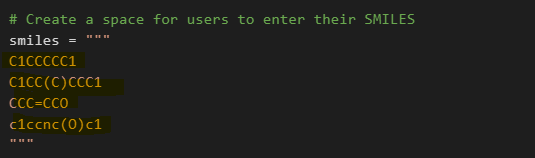

In [ ]:
# Create a space for users to enter their SMILES
smiles = """
C1CCCCC1
C1CC(C)CCC1
CCC=CCO
c1ccnc(O)c1
"""

# Save yours SMILES in the file
with open("examples/demo.smi", "w") as file:
    file.write(smiles)


# **run the application**

In [4]:

# execute gypsum_dl
!python run_gypsum_dl.py --source ./examples/demo.smi --output_folder ./gen3d --add_html_output



If you use Gypsum-DL in your research, please cite:

Ropp, Patrick J., Jacob O. Spiegel, Jennifer L. Walker, Harrison Green,
Guillermo A. Morales, Katherine A. Milliken, John J. Ringe, and Jacob D. Durrant.
(2019) Gypsum-DL: An Open-source Program for Preparing Small-molecule Libraries for 
Structure-based Virtual Screening. Journal of Cheminformatics 11:1. 
doi:10.1186/s13321-019-0358-3.

    Gypsum-DL-generated variants, we have identified a number of substructures
    that, though technically possible, strike us as improbable or otherwise
    poorly suited for virtual screening. We strongly recommend removing these by
    running Gypsum-DL with the --use_durrant_lab_filters option.

Loading molecules from demo.smi...
    Untitled ligand on line 1. Naming that ligand untitled_line_1. All
        associated files will be referred to with this name.
    Untitled ligand on line 2. Naming that ligand untitled_line_2. All
        associated files will be referred to with this name.
    U

# Next, we will download the following file (as shown in the image) 📥 and visualize it in the tool we want to use 👀🛠️. If we later want to extract each ligand from the SDF file, we can use other tools like OpenBabel 🔧. Below, I will leave the link to my repository if you need to use OpenBabel 🔗

If you have any questions, feel free to email me at sbolivar16@outlook.com ✉️.



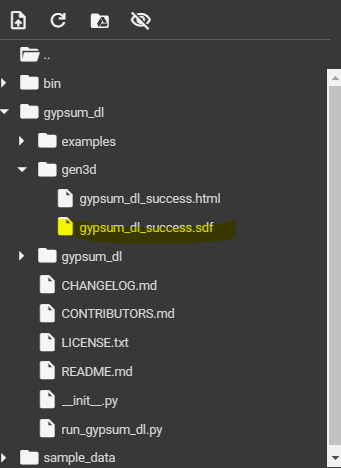